<a href="https://colab.research.google.com/github/kurtzace/complete-data-science-bootcamp-excercises/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Categorical variables. Visualization techniques |   scene
-- | --
Background | There is an ice cream   shop, that is operating in New York, LA and San Francisco.
Data | You have sold 12,327 ice   creams in New York; 17,129 in LA and 19,923 in San Francisco.
Task | Order the data in a   frequency distribution table. |   |  

In [2]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math

In [ ]:

data = [['NY',12327],['LA',17129],['SF',19923]]
df = pd.DataFrame(data,columns=['City','Sold'])
df

,City,Sold
0,NY,12327
1,LA,17129
2,SF,19923


<BarContainer object of 3 artists>

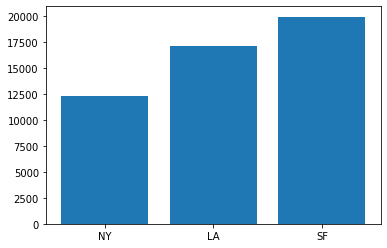

In [ ]:

plt.bar(df["City"],df["Sold"])

In [ ]:
df['relFreq']=df["Sold"]/(df["Sold"].sum())
df

,City,Sold,relFreq
0,NY,12327,0.249641
1,LA,17129,0.346888
2,SF,19923,0.403471


([<matplotlib.patches.Wedge at 0x7f2e0897d610>,
 [Text(0.7786953361784816, 0.7769385905037035, 'NY'),
  Text(-0.9740266733802704, 0.5111477668382838, 'LA'),
  Text(0.32849059675245446, -1.0498066144986975, 'SF')])

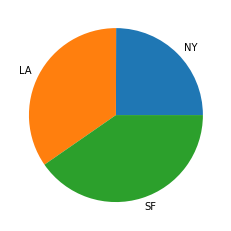

In [ ]:
plt.pie(df["relFreq"], labels=df["City"])

In [ ]:
df = df.sort_values("Sold", ascending=False,axis=0)

  City   Sold   relFreq  Cumulative
2   SF  19923  0.403471    0.403471
1   LA  17129  0.346888    0.750359
0   NY  12327  0.249641    1.000000


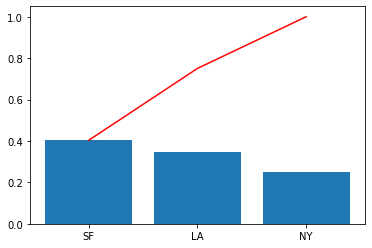

In [ ]:
df["Cumulative"]=df["relFreq"].cumsum()
print(df)
plt.bar(df["City"],df["relFreq"])
plt.plot(df["City"],df["Cumulative"],'r')
plt.show()

In [ ]:
## Distribution

## Distribution

### Dataset

```
13
68
165
193
216
228
361
470
500
529
544
602
647
692
696
699
809
892
899
936
```
Frequency distribution table
Desired intervals | 10



![image](https://user-images.githubusercontent.com/2136211/110235074-1a4a7600-7f54-11eb-8ad7-9e4e47ec88e8.png)


In [ ]:
distlist = [13,68,165,193,216,228,361,470,500,529,544,602,647,692,696,699,809,892,899,936]

In [ ]:
df = pd.DataFrame(distlist)

In [ ]:

interval_width = math.ceil((df.stack().max() - df.stack().min())/10)
print(interval_width)
bins = np.arange(df.stack().min(),df.stack().max()+interval_width,interval_width)
df=df.apply(lambda x: pd.cut(x, bins=bins).value_counts())
df
## idea from https://stackoverflow.com/a/45806493

93


,0
"(850, 943]",3
"(664, 757]",3
"(478, 571]",3
"(571, 664]",2
"(199, 292]",2
"(106, 199]",2
"(757, 850]",1
"(385, 478]",1
"(292, 385]",1
"(13, 106]",1


In [ ]:
df['relFreq']=round(df[0]/(df[0].sum()),2)
df

,0,relFreq
"(850, 943]",3,0.16
"(664, 757]",3,0.16
"(478, 571]",3,0.16
"(571, 664]",2,0.11
"(199, 292]",2,0.11
"(106, 199]",2,0.11
"(757, 850]",1,0.05
"(385, 478]",1,0.05
"(292, 385]",1,0.05
"(13, 106]",1,0.05


<BarContainer object of 10 artists>

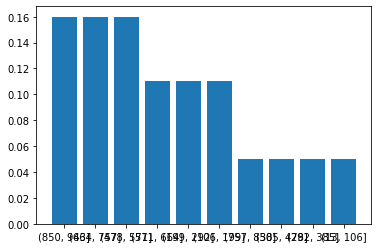

In [ ]:
df=df.reset_index()
df["index_str"]=df["index"].apply(lambda x:str(x))
plt.bar(df["index_str"],df['relFreq'])

## Cross Tables and Scatter Plots Exercise



Background | You are given the closing stock   prices of Apple, Alphabet Inc. (Google) and Bank of America on different   dates for a period of 6 months.
-- | --
Task 1 | Create a scatter plot with Apple and Alphabet stock   prices.
Task 2 | Create a scatter plot with Apple and Bank of America stock   prices
Task 3 | Explore if there is a relationship between the two variables.







In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/kurtzace/complete-data-science-bootcamp-excercises/main/statisticsfiles/scatter.csv")
df.head()

,Date,Apple (AAPL),Alphabet (GOOGL),Bank of America (BAC)
0,1/3/2017,116.15,808.01,22.53
1,1/4/2017,116.02,807.77,22.95
2,1/5/2017,116.61,813.02,22.68
3,1/6/2017,117.91,825.21,22.68
4,1/9/2017,118.99,827.18,22.55


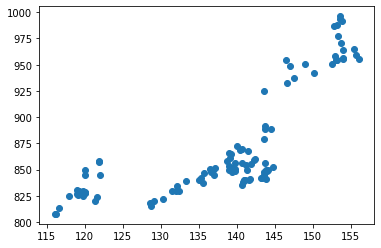

In [ ]:
plt.scatter(df['Apple (AAPL)'],df['Alphabet (GOOGL)'])

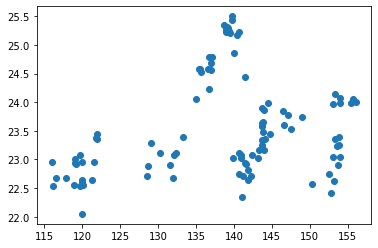

In [ ]:
plt.scatter(df['Apple (AAPL)'],df['Bank of America (BAC)'])

### cross table


Background | You have employment data about   country X. You have been asked to prepare a cross-table showing that data.
-- | --
  | 60% of 18 to 25-year-olds are employed
  | 85% of 25 to 35-year-olds are employed
  | 5% of 35 to 45-year-olds are unemployed
  | 3% of 45 to 55-year-olds are unemployed
  | 3% of 55 to 65-year-olds are unemployed
  | All 65+ are employed. Note: the definition of unemployed is:   without a job, but actively searching for one. That's probably why all 65+s   are employed.
Task 1 | Create a cross table summarizing the data you have been given.
Task 2 | Create a side-by-side bar chart (it is called clustered column   chart in Excel), in order to visually enhance your summary.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kurtzace/complete-data-science-bootcamp-excercises/main/statisticsfiles/employedcross.csv')
df.head()

,age-employment,employed,unemployed
0,18-25,0.60,0.40
1,25-35,0.85,0.15
2,35-45,0.95,0.05
3,45-55,0.97,0.03
4,55-65,0.97,0.03


In [ ]:
df['right_total']=df['employed']+df['unemployed']
df.loc[5] = ['Total', df['employed'].sum(), df['unemployed'].sum(), df['right_total'].sum()]
df

,age-employment,employed,unemployed,right_total
0,18-25,0.60,0.40,1.0
1,25-35,0.85,0.15,1.0
2,35-45,0.95,0.05,1.0
3,45-55,0.97,0.03,1.0
4,55-65,0.97,0.03,1.0
5,Total,9.68,1.32,11.0


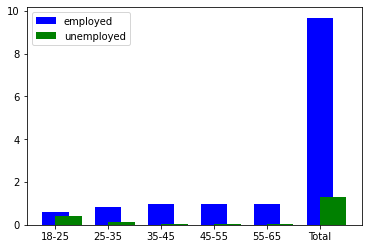

In [ ]:
ax = plt.subplot(111)
ax.bar(df['age-employment'], df['employed'], width=0.5, color='b', align='center' )
ax.bar(df['age-employment'], df['unemployed'], width=0.5, color='g', align='edge')
ax.legend(df.columns[1:])
plt.show()

## Mean Median Mode


Background | You   have a sample of 11 people and their personal annual income.
-- | --
Task 1 | Calculate the mean,   median and mode
Task 2 | Try to interpret on the   numbers you got


Annual income 
- \$62,000.00
- \$64,000.00
- \$49,000.00
- \$324,000.00
- \$1,264,000.00
- \$54,330.00
- \$64,000.00
- \$51,000.00
- \$55,000.00
- \$48,000.00
- \$53,000.00


In [9]:
## With library
sal = [62000.00,64000.00,49000.00,324000.00,1264000.00,54330.00,64000.00,51000.00,55000.00,48000.00,53000.00]
salNum = np.array(sal)
print(f'len {len(salNum)}')
print(f'mean {salNum.mean()}')
print(f'median {np.median(salNum)}')
from scipy import stats
stats.mode(salNum)

## nolibrary
salNum = np.array(sal)
print(f'mean no lib {np.sum(salNum)/len(salNum)}')

medianLow =0
medianHigh =0
if (len(salNum)%2)!=0:
  medianLow = math.floor(len(salNum) / 2)
  medianHigh =  math.ceil((len(salNum) / 2)+1)
sorted = np.sort(salNum)
print(sorted)
print(medianLow)
print(medianHigh)
print(len(salNum)/2)
mid= sorted[(int)(len(salNum)/2)] if (len(salNum)%2)==0 else (sorted[medianLow] + sorted[medianHigh])/2
print(f'median no lib {mid}')
mid= salNum[(int)(len(salNum)/2)] if (len(salNum)%2)==0 else (salNum[medianLow] + salNum[medianHigh])/2
print(f'median no lib no sort {mid}')

len 11
mean 189848.18181818182
median 55000.0
mean no lib 189848.18181818182
[  48000.   49000.   51000.   53000.   54330.   55000.   62000.   64000.
   64000.  324000. 1264000.]
5
7
5.5
median no lib 59500.0
median no lib no sort 52665.0


## Skewness


Background | You are given two datasets
-- | --
Task 1 | Identify the skewness of dataset 1. You may use the formula   from the lesson, the skewness formula in excel (=SKEW) or you can plot it on   a graph
Task 2 | Identify the skewness of dataset 2. You may use the formula   from the lesson, the skewness formula in excel (=SKEW) or you can plot it on   a graph


Dataset 1
212,869,220,654,511,624,420,121,428,865,799,405,230,670,870,366,99,55,489,312,493,163,221,84,144,48,375,86,168,100


Dataset 2

586,760,495,678,559,415,370,659,119,288,241,787,522,207,160,526,656,848,720,676,581,929,653,661,770,800,529,975,995,947


In [12]:
ds1=[212,869,220,654,511,624,420,121,428,865,799,405,230,670,870,366,99,55,489,312,493,163,221,84,144,48,375,86,168,100]
ds2=[586,760,495,678,559,415,370,659,119,288,241,787,522,207,160,526,656,848,720,676,581,929,653,661,770,800,529,975,995,947]

print("---DS1---")
ds1Num = np.array(ds1)
print(f'len {len(ds1Num)}')
print(f'mean {ds1Num.mean()}')
print(f'median {np.median(ds1Num)}')
from scipy import stats
print(stats.mode(ds1Num))

if(ds1Num.mean() > np.median(ds1Num)):
  print("left skew")
else:
  print("right skew")



print("---DS2---")
ds2Num = np.array(ds2)
print(f'len {len(ds2Num)}')
print(f'mean {ds2Num.mean()}')
print(f'median {np.median(ds2Num)}')
from scipy import stats
print(stats.mode(ds2Num))

if(ds2Num.mean() > np.median(ds2Num)):
  print("left skew")
else:
  print("right skew")

---DS1---
len 30
mean 370.03333333333336
median 339.0
ModeResult(mode=array([48]), count=array([1]))
left skew
---DS2---
len 30
mean 603.7333333333333
median 654.5
ModeResult(mode=array([119]), count=array([1]))
right skew


(array([7., 4., 3., 3., 3., 3., 0., 3., 0., 4.]),
 array([ 48. , 130.2, 212.4, 294.6, 376.8, 459. , 541.2, 623.4, 705.6,
        787.8, 870. ]),
 <a list of 10 Patch objects>)

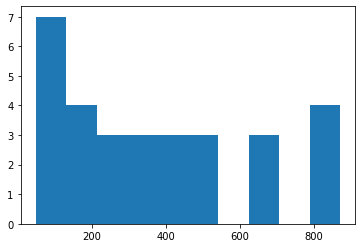

In [13]:
plt.hist(ds1, label="DS1")

(array([2., 3., 1., 1., 4., 3., 7., 4., 1., 4.]),
 array([119. , 206.6, 294.2, 381.8, 469.4, 557. , 644.6, 732.2, 819.8,
        907.4, 995. ]),
 <a list of 10 Patch objects>)

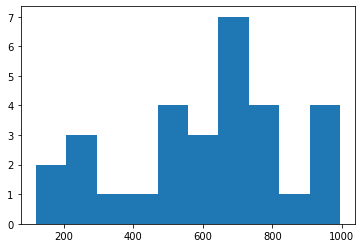

In [14]:
plt.hist(ds2, label="DS2")


## Variance
### Average income in the United   States


Background | You have the annual personal   income of 11 people from the USA. You have the mean income from the exercise   on mean, median and mode
-- | --
Task 1 | Decide whether you have to use sample or population formula   for the variance
Task 2 | Calculate the variance of their income
Task 3 | Generally, what does this number tell you?


Annual   income
62000,64000,49000,324000,1264000,54330,64000,51000,55000,48000,53000

Mean $ 189,848.18


In [15]:
df = pd.DataFrame([62000,64000,49000,324000,1264000,54330,64000,51000,55000,48000,53000], columns=["AnnualIncome"])

In [31]:
df["MinusMean"] = (df["AnnualIncome"]-189848.18)
df["MinusMeanSq"] = df["MinusMean"].apply(lambda x:x**2)
df.head()

,AnnualIncome,MinusMeanSq,MinusMean
0,62000,1.634516e+10,-127848.18
1,64000,1.583776e+10,-125848.18
2,49000,1.983821e+10,-140848.18
3,324000,1.799671e+10,134151.82
4,1264000,1.153802e+12,1074151.82


In [36]:
print(df.shape[0])
print(f"Variance as per sample {(df['MinusMeanSq'].sum()/(df.shape[0]-1))}")

11
Variance as per sample 133433409536.36368


In [26]:
np.var(df["AnnualIncome"].to_numpy())

121303099578.51239

## Standard Deviation and Coefficient of Variation Exercise


Background | You have the annual personal   income of 11 people from the USA and 11 from Denmark. You have the mean   income for USA from previous exercises
-- | --
Task 1 | Decide whether you have to use sample or population formula   for the standard deviation and the coefficient of variation
Task 2 | Calculate the standard deviation of income in the USA and in   Denmark
  |  
Task 3 | Calculate the coefficient of variation of income in the USA   and in Denmark
Task 4 | Try to interpret the numbers you got


Annualincome USA  |  Annual income Denmark
--  | --
\$62,000.00  |  462,852.37 kr.
\$64,000.00  |  470,317.73 kr.
\$49,000.00  |  567,367.42 kr.
\$ 324,000.00  |  589,763.50 kr.
\$1,264,000.00  |  500,179.17 kr.
\$54,330.00  |  492,713.81 kr.
\$64,000.00  |  515,109.89 kr.
\$51,000.00  |  507,644.53 kr.
\$55,000.00  |  425,525.56 kr.
\$48,000.00  |  522,575.25 kr.
\$53,000.00  |  500,179.17 kr.



Mean US | \$   189,848.18
-- | --
Variance US | \$**2  133,433,409,536.36



In [8]:
usa=[62000,64000,49000,324000,1264000,54330,64000,51000,55000,48000,53000]
den=[462852.37,470317.73,567367.42,589763.50,500179.17,492713.81,515109.89,507644.53,425525.56,522575.25,500179.17]
meanUsa = np.mean(usa)
meanDen = np.mean(den)
varUsa = np.var(usa) #we should have used sample formula instead
varDen = np.var(den)
stdUsa = np.std(usa)
stdDen = np.std(den)

coefficientVariationUsa = stdUsa/meanUsa
coefficientVariationDen = stdDen/meanDen
print(f"US:Mean:{meanUsa},VAR:{varUsa},STD:{stdUsa}, coeff:{coefficientVariationUsa}")
print(f"DEN:Mean:{meanDen},VAR:{varDen},STD:{stdDen}, coeff:{coefficientVariationDen}")

print("US has high variance, den has low variance")

US:Mean:189848.18181818182,VAR:121303099578.51239,STD:348285.9451349026, coeff:1.8345498060574374
DEN:Mean:504929.8545454545,VAR:1907771378.3224075,STD:43678.042290405, coeff:0.08650318830865059
US has high variance, den has low variance


## Covariance 

![image](https://user-images.githubusercontent.com/2136211/110451549-4e579f80-80ea-11eb-944b-71f3b683e812.png)

Background | You are given data on the SAT   reading and writing scores of several students from our lesson on cross   tables and scatter plots
-- | --
Task   1 | Determine if this is sample or population
Task   2 | Calculate the covariance of the two datasets
Task   3 | Plot the data on scatter plot and using your previous   knowledge comment on whether there is a noticeable relationship between the   two variables.


Writing | Reading
-- | --
344 | 378
383 | 349
611 | 503
713 | 719
536 | 503



In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/kurtzace/complete-data-science-bootcamp-excercises/main/statisticsfiles/coeffVar.csv")
df.head()

,Writing,Reading
0,344,378
1,383,349
2,611,503
3,713,719
4,536,503


In [17]:
df["Numerator"]=(df["Writing"]-df["Writing"].mean())*(df["Reading"]-df["Reading"].mean())
df.head()

,Writing,Reading,Numerator
0,344,378,19490.16
1,383,349,19004.16
2,611,503,1179.36
3,713,719,44714.16
4,536,503,234.36


In [22]:
covariance=(df["Numerator"].sum())/(df["Numerator"].shape[0]-1)
covariance

21155.55

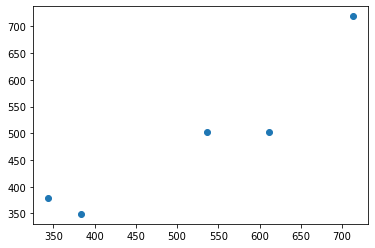

In [21]:
plt.scatter(df["Writing"],df["Reading"],label='Writing vs Reading')

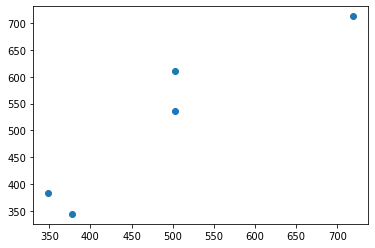

In [24]:
plt.scatter(df["Reading"],df["Writing"],label='opp')
plt.show()

## Calculate   the correlation coefficient of the two datasets.
![image](https://user-images.githubusercontent.com/2136211/110455299-47cb2700-80ee-11eb-99dd-3f898a4ef43e.png)

In [31]:
sx=np.std(df["Writing"].to_numpy())
sy=np.std(df["Reading"].to_numpy())

print(f'Corr Coeff {(df["Numerator"].sum()/df["Numerator"].shape[0])/(sx*sy)}') ## strong corrr

Corr Coeff 0.9381257133317581



Standard   normal distribution

Background | You are given an approximately   normally distributed dataset
-- | --
Task 1 | Calculate the mean and standard deviation of the dataset
Task 2 | Standardize the dataset
Task 3 | Plot the data on a graph to see the change



Original   dataset
--
567.45
572.45
572.45
589.12
613.87
615.78
628.45
644.87
650.45
652.20
656.87
661.45
666.45
667.70
668.95
675.28
675.78
685.53
694.28
697.62
705.78
705.87
708.12
711.03
714.03
716.03
722.28
728.12
728.70
729.03
730.12
731.95
735.03
736.95
737.37
738.28
739.78
740.62
743.62
747.20
748.20
748.28
748.53
750.03
752.12
754.70
755.03
758.37
760.53
764.03
769.28
775.45
781.20
781.70
785.62
792.78
793.37
795.28
797.62
798.95
799.70
799.95
810.87
811.53
813.62
814.03
814.78
817.87
818.87
820.70
821.12
825.62
828.62
841.45
842.03
842.87
849.62
874.70
878.78
897.45







In [33]:
preStd=[567.45,572.45,572.45,589.12,613.87,615.78,628.45,644.87,650.45,652.20,656.87,661.45,666.45,667.70,668.95,675.28,675.78,685.53,694.28,697.62,705.78,705.87,708.12,711.03,714.03,716.03,722.28,728.12,728.70,729.03,730.12,731.95,735.03,736.95,737.37,738.28,739.78,740.62,743.62,747.20,748.20,748.28,748.53,750.03,752.12,754.70,755.03,758.37,760.53,764.03,769.28,775.45,781.20,781.70,785.62,792.78,793.37,795.28,797.62,798.95,799.70,799.95,810.87,811.53,813.62,814.03,814.78,817.87,818.87,820.70,821.12,825.62,828.62,841.45,842.03,842.87,849.62,874.70,878.78,897.45]

In [40]:
df=pd.DataFrame(preStd, columns=["In"])
ourmean=np.mean(df["In"])
stddev=np.std(df["In"])
print(f"Mean {ourmean}, stddev {stddev}")
df["std"]=(df["In"]-ourmean)/stddev

print(f'STD: Mean {np.mean(df["std"])}, stddev {np.std(df["std"])}')
df.head(10)

Mean 743.0269999999998, stddev 73.48951126521389
STD: Mean 2.4147350785597155e-15, stddev 1.0


,In,std
0,567.45,-2.389144
1,572.45,-2.321107
2,572.45,-2.321107
3,589.12,-2.094272
4,613.87,-1.757489
5,615.78,-1.731499
6,628.45,-1.559093
7,644.87,-1.335660
8,650.45,-1.259731
9,652.20,-1.235918
